In [1]:
# 7.4

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal, wishart

In [2]:
mu0 = [50, 50]
L0 = np.array([[625, 312.5],
              [312.5, 625]])

nu0 = 4
S0 = np.array([[625, 312.5],
              [312.5, 625]])

In [3]:
Y = np.array([59, 43, 34, 32, 42, 38, 55, 67, 64, 45, 49, 72, 34, 
70, 34, 50, 41, 52, 60, 34, 28, 35, 77, 39, 46, 26, 38, 43, 68, 
86, 77, 60, 50, 59, 38, 48, 55, 58, 54, 60, 75, 47, 48, 33])

Y = Y.reshape((2,22)).T
n = Y.shape[0]
ybar = np.mean(Y, axis=0)
Sigma = np.cov(Y, rowvar=False, ddof=1)
THETA = []
SIGMA = []

In [4]:
for s in range(5000):
    # Update Theta
    L0_inv = inv(L0)
    Sigma_inv = inv(Sigma)
    Ln = inv( L0_inv + n * Sigma_inv)
    mun = np.matmul(Ln, np.matmul(L0_inv, mu0) + n * np.matmul(Sigma_inv, ybar))
    theta = multivariate_normal(mean=mun, cov=Ln).rvs(1)
    
    # Update Sigma
    Sn = S0 + np.matmul((Y - theta).T, (Y - theta))
    Sigma = inv(wishart(nu0 + n, inv(Sn)).rvs(1))
    
    THETA.append(theta)
    SIGMA.append(Sigma)

THETA = np.array(THETA)
SIGMA = np.array(SIGMA)

In [5]:
np.quantile(THETA[:,1] - THETA[:,0], [0.025, 0.5, 0.975])

array([ 1.34980954,  6.5566605 , 11.71895757])

In [6]:
np.mean(THETA[:,1] > THETA[:,0])

0.9924

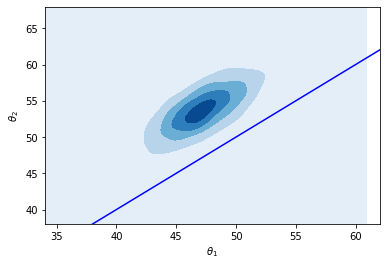

In [7]:
ax = sns.kdeplot(THETA[:,0], THETA[:,1], shade=True, n_levels=4, cmap="Blues")
ax.set(xlabel=r"$\theta_1$", ylabel=r"$\theta_2$", xlim=(34, 62), ylim=(38,68));
x = np.linspace(30,65,100)
plt.plot(x, x, '-b')

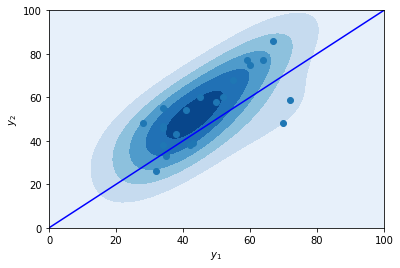

In [8]:
ax = sns.kdeplot(Y[:,0], Y[:,1], shade=True, n_levels=5, cmap="Blues", bw=1, cut=40)
ax.set(xlabel=r"$y_1$", ylabel=r"$y_2$", xlim=(0, 100), ylim=(0, 100));
x = np.linspace(0,100,100)
plt.plot(x, x, '-b');
plt.scatter(Y[:,0], Y[:,1])

In [9]:
np.mean(Y[:,1] > Y[:,0])

0.7272727272727273